In [ ]:
%pip install qiskit matplotlib

In [1]:
# Инициализация matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Импорт библиотеки для квантовых вычилений Qiskit
from qiskit import BasicAer, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# Импорт построения гистограмм
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector

In [2]:
# Создание симуляторов
sv_sim = Aer.get_backend('statevector_simulator')
qasm_sim = BasicAer.get_backend('qasm_simulator')

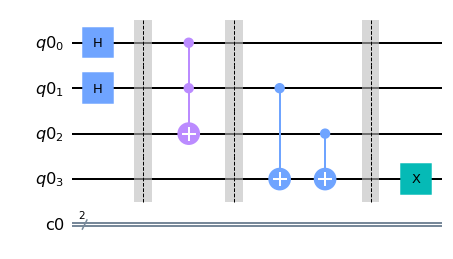

In [3]:
q = QuantumRegister(4)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

qc.h(0)
qc.h(1)
qc.barrier()

qc.mct([0, 1], 2)
qc.barrier()

qc.cx(1, 3)
qc.cx(2, 3)
qc.barrier()

qc.x(3)

qc.draw(output='mpl')

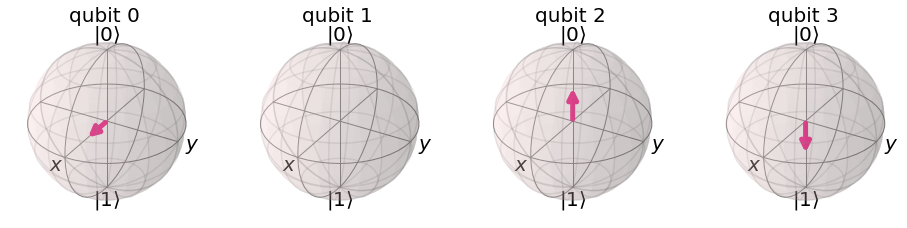

In [4]:
result = execute(qc, sv_sim).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

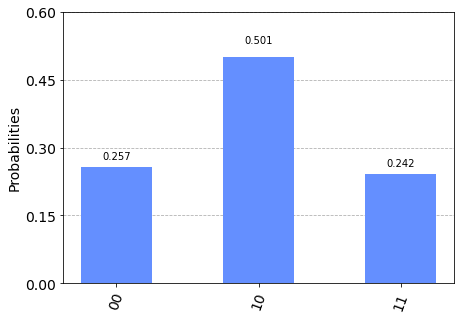

In [5]:
ms_qc = qc.copy()
# ms_qc.measure_all()

ms_qc.measure(q[2], c[0])
ms_qc.measure(q[3], c[1])

shots = 16*1024
results = execute(ms_qc, backend=qasm_sim, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

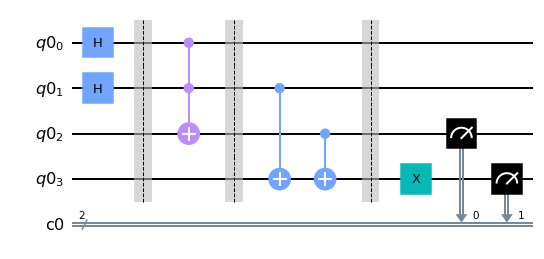

In [6]:
ms_qc.draw(output='mpl')